In [8]:
import json
import xtrack as xt
import xpart as xp
import xobjects as xo
from matplotlib import pyplot as plt

context = xo.ContextCpu()

#with open('../data/collider_thin.json') as f:
#    dct = json.load(f)

#line = xt.Line.from_dict(dct['lines']['lhcb1'])
#line_edited =line.copy()

collider = xt.Multiline.from_json('../data/collider_thin.json')

line = collider['lhcb1']
for ii in line.elements:
   # if ii is a type 'multipole' 
    if type(ii) == xt.beam_elements.elements.Multipole:
        if len(ii.knl)>2:
            print(ii)
            ii.knl[2] = 0

line.vars['i_oct_b1'] = 0
line.vars['i_sext_b1'] = 0

line_edited = line.copy()
plt.close('all')

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Multipole(_order=3, inv_factorial_order=0.16666666666666666, length=0.066, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0.  0. -0.], ksl=[0. 0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=4, inv_factorial_order=0.041666666666666664, length=0.066, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0.  0.  0. -0.], ksl=[0. 0. 0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=2, inv_factorial_order=0.5, length=0.11, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0. -0.], ksl=[0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=2, inv_factorial_order=0.5, length=0.11, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0. -0.], ksl=[0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=3, inv_

In [9]:
#Only one particle
my_particle = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x = 0.003)
line.particle_ref = my_particle
num_turns = 50

num_particles = 3
monitor_ip3 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
line.insert_element(index='ip3', element=monitor_ip3, name='mymon3')
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')




line.build_tracker()


monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=num_turns,
                              num_particles=num_particles)
line.track(my_particle, num_turns=num_turns)

aux = line.twiss()

Found suitable prebuilt kernel `default_only_xtrack`.


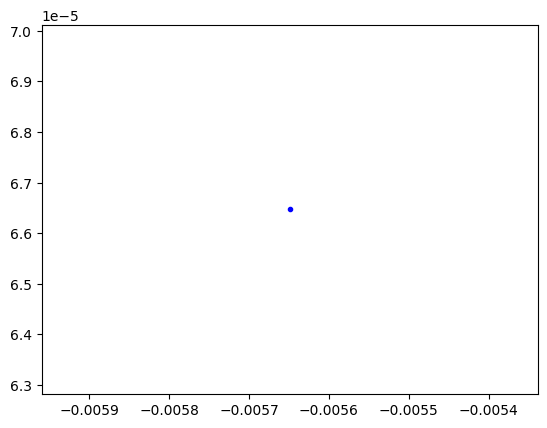

In [10]:
plt.plot(my_particle.x, my_particle.px, '.b') 

In [11]:
monitors = {}  # Create an empty dictionary to store the monitors
#num_particles = 2
#num_turns = 50
line_edited.discard_tracker()
for jj, ii in enumerate((['ip3']+list(aux[:, 'bpm.*']['name']))):
    monitor_name = f"mymon_{ii.replace('.', '_')}"
    monitors[monitor_name] = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns, num_particles=num_particles)
    line_edited.insert_element(index=ii,
                                element=monitors[monitor_name], 
                                name=monitor_name)


In [12]:

line_edited.particle_ref = my_particle
line_edited.discard_tracker()
line_edited.build_tracker()
print(line_edited.twiss()[:,'mymon_.*'])
len(line_edited.twiss()[:,'mymon_.*']['mux'])


Found suitable prebuilt kernel `default_only_xtrack`.
TwissTable: 568 rows, 35 cols
name                           s x px y py zeta delta        ptau    betx ...
mymon_ip3                      0 0  0 0  0    0     0           0 121.567
mymon_bpmw_4r3_b1        22.5205 0  0 0  0    0     0           0 44.3246
mymon_bpmwe_4r3_b1       50.0655 0  0 0  0    0     0           0 30.7221
mymon_bpmw_5r3_b1        125.194 0  0 0  0    0     0           0 347.646
mymon_bpmwj_a5r3_b1      153.912 0  0 0  0    0     0           0 302.554
mymon_bpmwc_6r3_b1        193.73 0  0 0  0    0     0           0 64.7947
mymon_bpmr_6r3_b1        205.808 0  0 0  0    0     0           0 39.6088
mymon_bpm_a_7r3_b1       261.632 0  0 0  0    0     0           0 90.9051
mymon_bpm_8r3_b1         300.696 0  0 0  0    0     0           0 34.1434
mymon_bpm_9r3_b1         339.761 0  0 0  0    0     0           0 128.544
mymon_bpm_10r3_b1        380.224 0  0 0  0    0     0           0 54.4523
mymon_bpm_11r3_b1       

568

In [15]:
#dir(aux)

In [14]:
#line_edited.twiss()[:, 'mymon_.*'].mux
#print(len(line_edited.twiss()[:, 'mymon_.*'].mux))

In [16]:
# generates a matched gaussian bunch and tracks it through the line
# the line is then edited to include BPMs and the bunch is tracked again
# the BPMs are then used to calculate the emittance of the bunch
# 
particles = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=-0.003)

particles = xp.generate_matched_gaussian_bunch(line=line,
                                               num_particles=num_particles,
                                               nemitt_x=2.5e-6,
                                               nemitt_y=2.5e-6,
                                               sigma_z=9e-2)
line_edited.track(particles, num_turns=num_turns)

*** Maximum RMS bunch length 0.11789515101464539m.
... distance to target bunch length: -9.0000e-02
... distance to target bunch length: 2.4638e-02
... distance to target bunch length: 2.2508e-02
... distance to target bunch length: 4.1016e-03
... distance to target bunch length: -8.2454e-03
... distance to target bunch length: 6.8134e-04
... distance to target bunch length: -1.5958e-05
... distance to target bunch length: 2.5080e-07
... distance to target bunch length: -3.9266e-08
--> Bunch length: 0.08999996073381336
--> Emittance: 2.949391561302401


15000
50


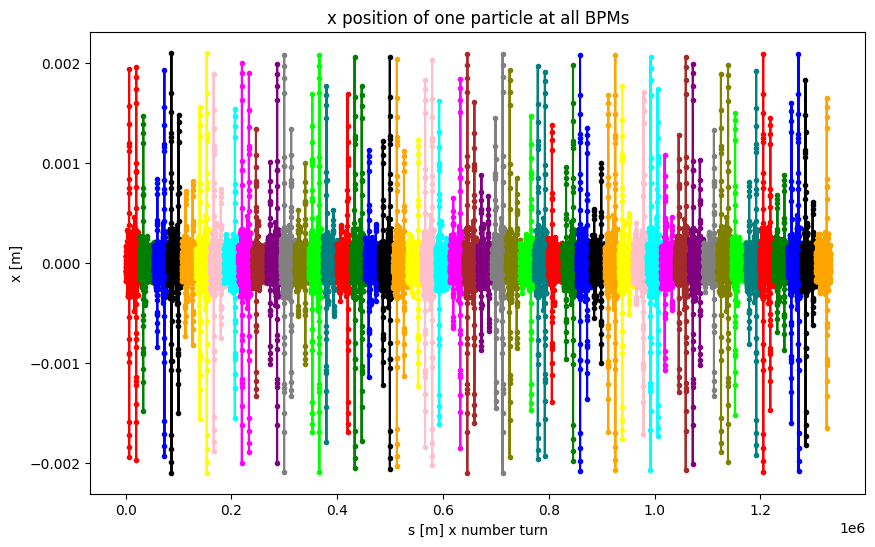

In [17]:
import numpy as np
plt.figure(figsize=(10, 6))
#s_list = [monitors[ii].s[0,0] for ii in monitors]
#print(s_list[0])
#for jj in range(len(monitors)
n = np.arange(0, num_turns)
twiss = line_edited.twiss()
mux = twiss[:,'mymon.*'].mux
betx = twiss[:,'mymon.*'].betx
#print(len(twiss['mux']))
#mux = twiss.mux
#print(len(mux))
#print(n)
x_list_all = []
x_list0 = []  
s_list0 = []
c = 1000*['red', 'green', 'blue', 'black', 'orange', 'yellow', 'pink', 'cyan', 'magenta', 'brown', 'purple', 'gray', 'olive', 'lime', 'teal']
print(len(c))
for jj in n:
    #print(jj)
    x_list = [monitors[ii].x[0,jj] for ii in monitors]   #monitors[ii].x[i,j], i is the particle number, j is the turn number

    #x_list0 = [monitors[ii].x[0,0] for ii in monitors]
    s_list = [monitors[ii].s[0,jj] for ii in monitors]
    x_list_all.extend(x_list)
    #print(len(x_list_all))
    mon = monitors['mymon_ip3'].x[0,jj]  #just the first particle, one monitor for all turns
    mon_position = monitors['mymon_ip3'].s[0,jj]    
    #mux = twiss[:,'mymon_ip3'].mux
    #print(mux)
    x_list0.append(mon)  
    s_list0.append(mon_position) #

    #print(s_list)
    #plt.plot(s_list+(jj)*s_list[-1], x_list, '.-r')
    plt.plot(s_list + jj*s_list[-1], x_list, '.-', color=c[jj])
    
    
    #plt.plot(mux, x_list/np.sqrt(betx), '.-r')
    #plt.xlim(0,4)

    
#plt.plot(s_list, x_list0, 1'.-b')
#print(s_list0)
x = np.fft.fft(x_list_all)
sampling_frequency = 11245.5
plt.xlabel('s [m] x number turn')
plt.ylabel('x [m]')
plt.title('x position of one particle at all BPMs')
print(len(x_list0))
plt.show()

#fft_try = abs(np.fft.fft(x_list0 - np.mean(x_list0)))
fft_try = np.fft.fft(x_list0) # fft of one monitor for all turns
fft_try = fft_try/len(fft_try)*2 #normalization
fft = fft_try.real + 1j*fft_try.imag 
# 
fft_used = abs(fft) - np.mean(abs(fft))
freq_try = np.fft.fftfreq(len(fft_used), d = 1/len(fft_used))
#freq_try = np.fft.fftfreq(len(x_list0), d = 1/len(x_list0))

freq_try  =  np.linspace(0, sampling_frequency, len(fft_used))

plt.show()




Text(0.5, 1.0, 'x position of the first particle at IP3')

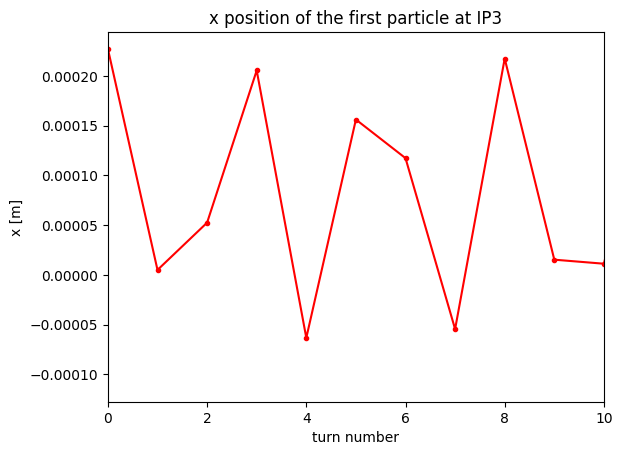

In [13]:
plt.plot(np.arange(num_turns), x_list0, '.-r') 
plt.xlim(0, 10)
plt.xlabel('turn number')
plt.ylabel('x [m]')
plt.title('x position of the first particle at IP3 (only one monitor)')

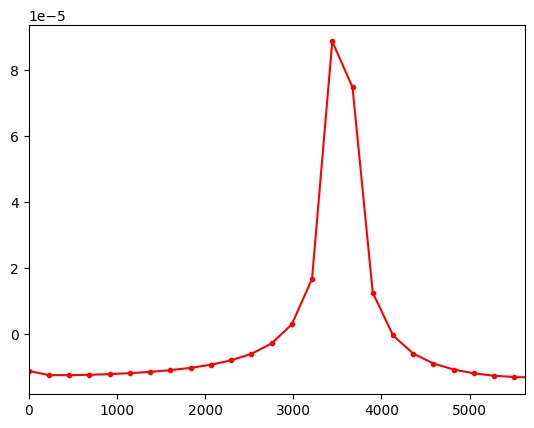

In [18]:
plt.plot(freq_try, fft_used, '.-r')
plt.xlim(0, sampling_frequency/2) #niquist frequency
plt.show()


betx [1.21566845e+02 4.43246497e+01 3.07221360e+01 3.47645860e+02
 3.02553918e+02 6.47947280e+01 3.96087950e+01 9.09051469e+01
 3.41433565e+01 1.28543712e+02 5.44523022e+01 1.85453660e+02
 3.99698635e+01 1.72107497e+02 3.31090717e+01 1.72239651e+02
 3.33062025e+01 1.71819934e+02 3.31097393e+01 1.72251651e+02
 3.33055047e+01 1.71808000e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.31104672e+01 1.71799312e+02 3.31104672e+01 1.71799311e+02
 3.33017802e+01 1.72260069e+02 3.31131592e+01 1.71812356e+02
 3.33031973e+01 1.72246955e+02 3.31117713e+01 1.71825537e+02
 2.89397374e+01 1.74030983e+02 3.47172037e+01 3.44884206e+01
 1.21203778e+02 1.21970627e+02 1.33360548e+01 1.32396809e+01
 1.51584285e+02 1.5

Text(0, 0.5, '$x/\\sqrt{betx}$')

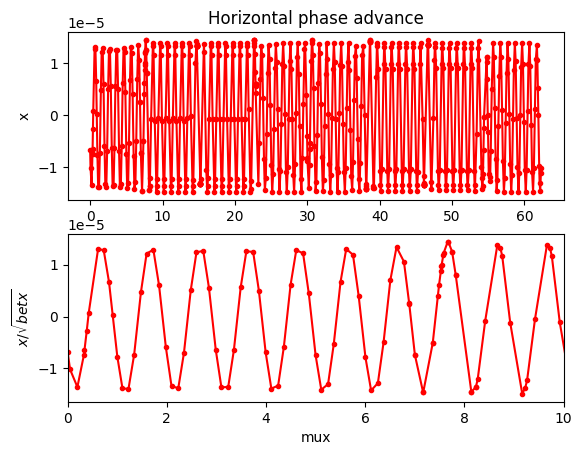

In [34]:
# Data for only the first turn, all BPMs
print('betx', betx)
plt.subplot(2,1,1)
plt.plot(mux, x_list_all[0:len(mux)]/np.sqrt(betx), '.-r')
plt.title('Horizontal phase advance')
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(mux, x_list_all[0:len(mux)]/np.sqrt(betx), '.-r')
plt.xlim(0, 10)
#plt.xlim(20, 40)
print('mux', twiss[:,'mymon.*'].mux)
print('len mux', len(twiss[:,'mymon.*'].mux))
print('twiss.mux', len(twiss.mux))

plt.xlabel('mux')
plt.ylabel('$x/\sqrt{betx}$')


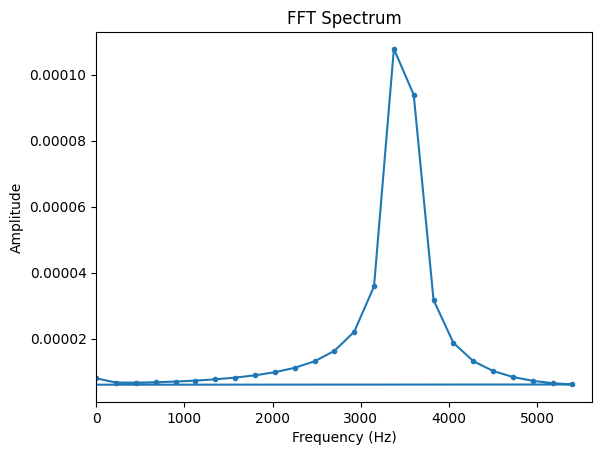

In [20]:
fft_try = np.fft.fft(x_list0)

# Normalize the FFT result
fft_normalized = fft_try / len(fft_try)*2

# Calculate the frequency axis
sampling_frequency = 11245.5 # Adjust this to match your actual sampling frequency
freq_try = np.fft.fftfreq(len(fft_normal'
line.discard_tracker()


# Plot the frequency spectrum
plt.plot(freq_try, fft_amplitude, '.-')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT Spectrum")
plt.xlim(0, sampling_frequency / 2)  # Nyquist frequency

plt.show()

['R_matrix', 'T_rev0', 'W_matrix', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_col_names', '_count_sep', '_data', '_error_on_row_not_found', '_get_index', '_get_index_cache', '_get_name_index', '_get_name_indices', '_get_name_mask', '_get_names_indices', '_get_rows_cols', '_get_view_col_list', '_index', '_index_cache', '_multiple_row_selections', '_nrows', '_offset_sep', '_regex_flags', '_split_name_count_offset', 'alfx', 'alfy', 'betx', 'betx1', 'betx2', 'bety', 'bety1', 'bety2', 'betz0', 'c_minus', 'c_r1_avg', 'c_r2_avg', 'circumference', 'cols', 'delta', 'dmux', 'dmuy', 'dpx', 'dpy', 'dqx'

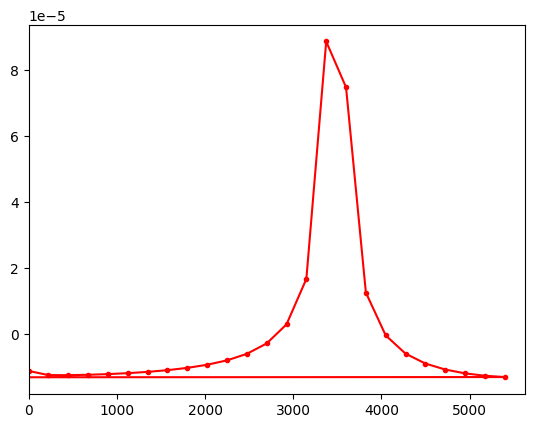

In [49]:
# 10000 turns, maybe this is the tune spread?
plt.plot(freq_try, fft_used, '.-r')
plt.xlim(0, sampling_frequency/2)
#plt.xlim(0.1, 0.5)
# find the tune

print(dir(twiss))
#ind = np.where(fft_used==np.max(fft_used))
ind = np.where(fft_amplitude==np.max(fft_amplitude))
freq_try[ind]
for i in range(len(freq_try[ind])):
    if freq_try[ind][i] > 0.1:
        freq_max = freq_try[ind][i]
        print('Frequency where max occurs = {f} Hz'.format(f=freq_max))

tune = (freq_max)/sampling_frequency
print('Tune = {t} horizontal oscillation per turn'.format(t = tune))



array([ 0.37, -0.37])

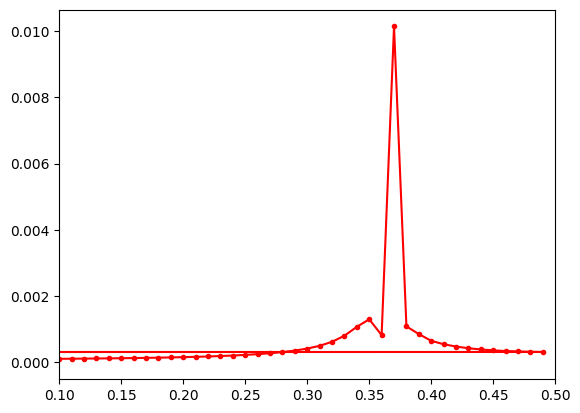

In [ ]:
# 50 turns, tune -.37, reference value is -0.352
plt.plot(freq_try, fft_try, '.-r')
plt.xlim(0.1, 0.5)
# find the tune
twiss = line_edited.twiss()
twiss.dqx
ind = np.where(fft_try==np.max(fft_try))
fft_try[ind]
freq_try[ind]


In [ ]:
line.twiss().betx

array([121.56684498, 121.56684498, 121.56684498, ..., 225.46408801,
       121.56684498, 121.56684498])

In [50]:
## take one bpm and do an fft



sampling_frequency = 11245.5
time = np.arange(0, 1, 1/sampling_frequency)
signal_fft = abs(np.fft.fft(x_list0))
signal_fft = signal_fft/len(signal_fft)*2. # normalization
signal_freqs = np.linspace(0, sampling_frequency, len(time))

def get_aliased_frequency(freq):
    while freq > sampling_frequency / 2:
        freq = abs(sampling_frequency-freq)
    return freq

freqs = [get_aliased_frequency(freq) for freq in signal_freqs]

ValueError: x and y must have same first dimension, but have shapes (11246,) and (50,)

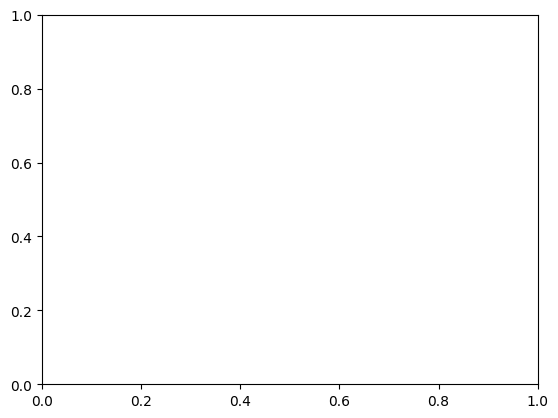

In [51]:
plt.plot(freqs, signal_fft)

In [9]:

# Now for a more realistic example we want to track a gaussian bunch of particles
# Matched to the RF bucket
N_particles = 10001
bunch_intensity = 2.2e11
normal_emitt_x = 2.5e-6 #m*rad
normal_emitt_y = 2.5e-6 #m*rad
sigma_z = 7.6e-2
particle_ref = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9)
gaussian_bunch = xp.generate_matched_gaussian_bunch(
        num_particles = N_particles, total_intensity_particles = bunch_intensity,
        nemitt_x = normal_emitt_x, nemitt_y=normal_emitt_y, sigma_z = sigma_z,
        particle_ref = particle_ref,
        line = collider['lhcb1'])
dir(gaussian_bunch)


*** Maximum RMS bunch length 0.11789515101464537m.
... distance to target bunch length: -7.6000e-02
... distance to target bunch length: 3.8638e-02
... distance to target bunch length: 3.4189e-02


... distance to target bunch length: 8.2053e-03
... distance to target bunch length: -1.2051e-02
... distance to target bunch length: 9.0274e-04
... distance to target bunch length: -2.7068e-05
... distance to target bunch length: 2.4776e-07
... distance to target bunch length: -1.1678e-07
--> Bunch length: 0.0759998832223215
--> Emittance: 2.178957765090958


['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allclose',
 '_assert_values_consistent',
 '_beta0',
 '_beta0_setitem',
 '_buffer',
 '_bypass_linked_vars',
 '_capacity',
 '_cname',
 '_contains_lost_or_unallocated_particles',
 '_context',
 '_delta',
 '_delta_setitem',
 '_extra_c_sources',
 '_fields',
 '_gamma0',
 '_gamma0_setitem',
 '_has_valid_rng_state',
 '_init_random_number_generator',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_num_active_particles',
 '_num_lost_particles',
 '_num_shown_particles',
 '_offset',
 '_overridable',
 '_p0c',
 '_p0c_setitem',
 '_ptau',
 '_ptau_setitem',
 '_py_

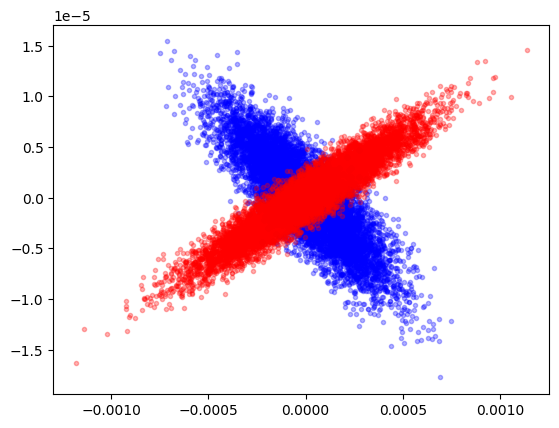

In [10]:

starting_x = gaussian_bunch.x
starting_y = gaussian_bunch.y
starting_px = gaussian_bunch.px
starting_py = gaussian_bunch.py
plt.plot(starting_x, starting_px, '.b', alpha=0.3)
plt.plot(starting_y, starting_py, '.r', alpha=0.3)


Text(0.5, 1.0, 'Transverse phase space')

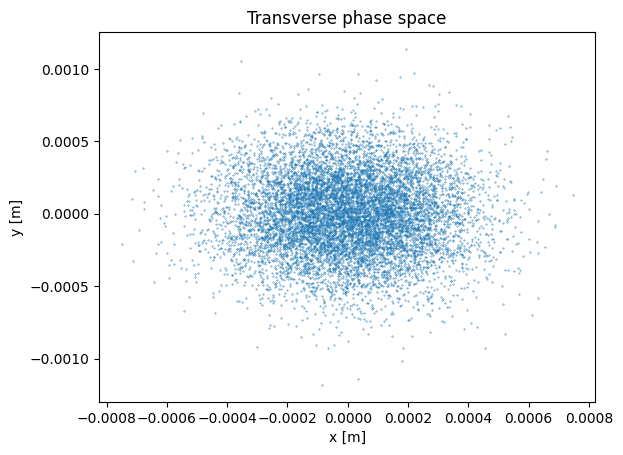

In [11]:
plt.scatter(starting_x, starting_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

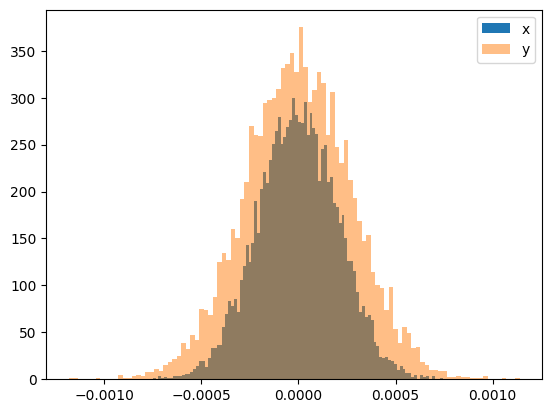

In [12]:
# Distribution of the gaussian bunch in x and y

plt.hist(starting_x, bins=100, label = 'x')
plt.hist(starting_y, bins=100, alpha=0.5, label='y')
plt.legend()

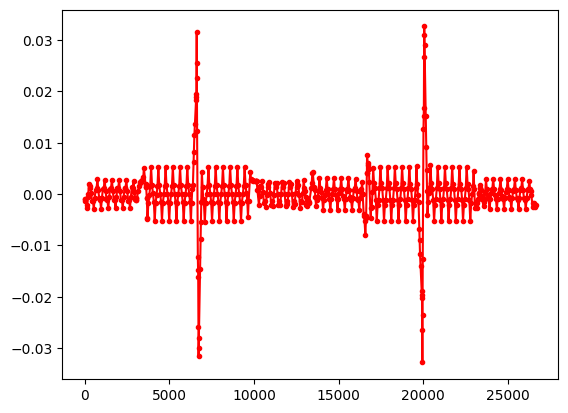

In [13]:
s_list = [monitors[ii].s[0,0] for ii in monitors]
x_list = [monitors[ii].x[0,0] for ii in monitors]
plt.plot(s_list, x_list, '.-r')

In [14]:
collider['lhcb1'].track(gaussian_bunch, num_turns = num_turns)

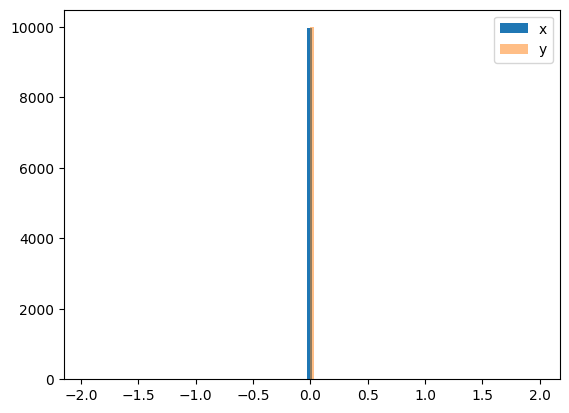

In [ ]:
ending_x = context.nparray_from_context_array(gaussian_bunch.x).copy()
ending_y = context.nparray_from_context_array(gaussian_bunch.y).copy()
ending_px = context.nparray_from_context_array(gaussian_bunch.px).copy()
ending_py = context.nparray_from_context_array(gaussian_bunch.py).copy()
plt.hist(ending_x, bins=100, label = 'x')
plt.hist(ending_y, bins=100, alpha=0.5, label='y')
plt.legend()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 9.974e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

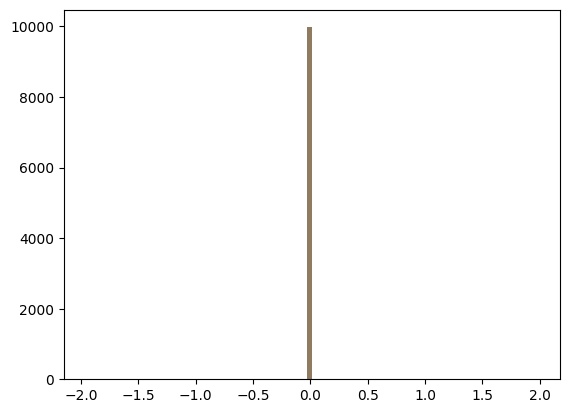

In [ ]:
plt.hist(starting_x, bins=100)
plt.hist(ending_x, bins=100, alpha=0.5)

Text(0.5, 1.0, 'Transverse phase space')

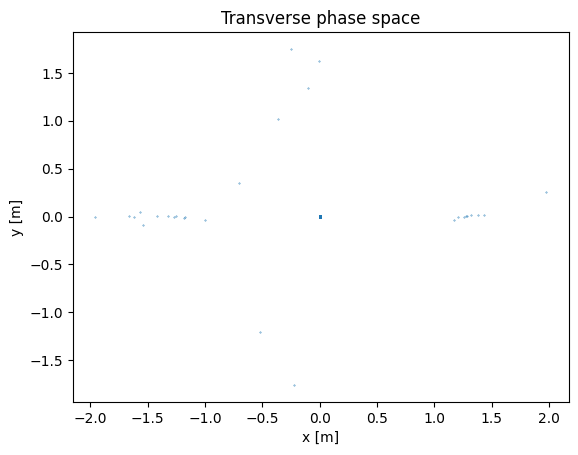

In [ ]:
plt.scatter(ending_x, ending_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

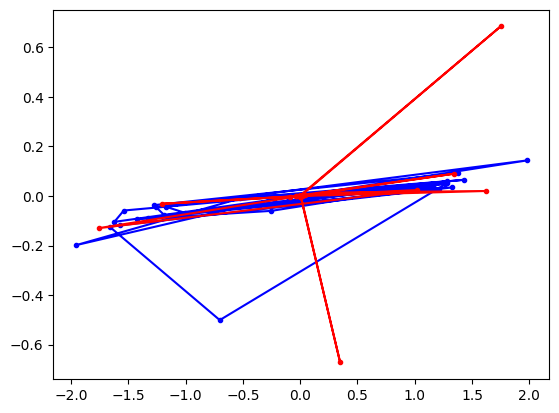

In [ ]:
plt.plot(ending_x, ending_px, '.-b')
plt.plot(gaussian_bunch.y, gaussian_bunch.py, '.-r')